# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod i w pojawiającym się czarnym obrazie kliknij jeden punkt 
   2. Zamknij edycję przyciskiem w belce okna (obok bazwy Figure 1). Wygenerowany obraz będzie dostępny pod nazwą im.

(-0.5, 63.5, 63.5, -0.5)

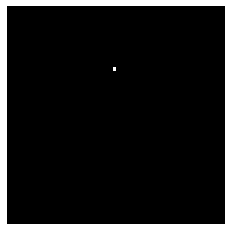

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import wget

if not os.path.exists("kwadraty.png") :
    wget.download("https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png")
if not os.path.exists("lab112.png") :
    wget.download("https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png")
if not os.path.exists("dom.png") :
    wget.download("https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png")

im = np.zeros((64,64), dtype=np.uint8)

# "Klikanie" w różne punkty
im[18, 31] = 1
#im[0, 0] = 1
#im[32, 32] = 1
#im[18, 14] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

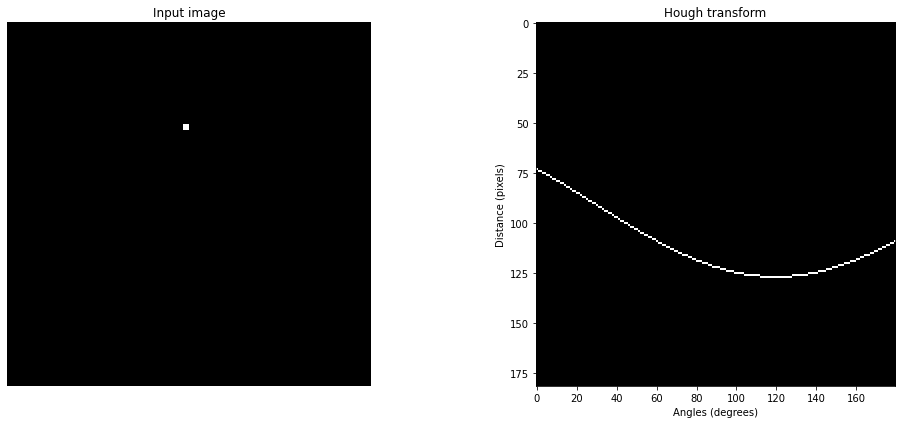

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()

imHough, _, _ = hough_line(im)

show_hough(imHough, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

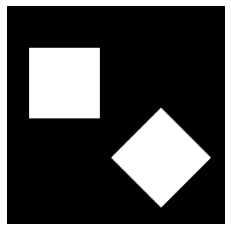

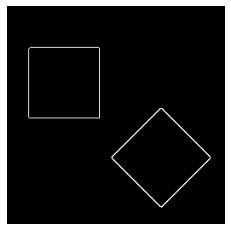

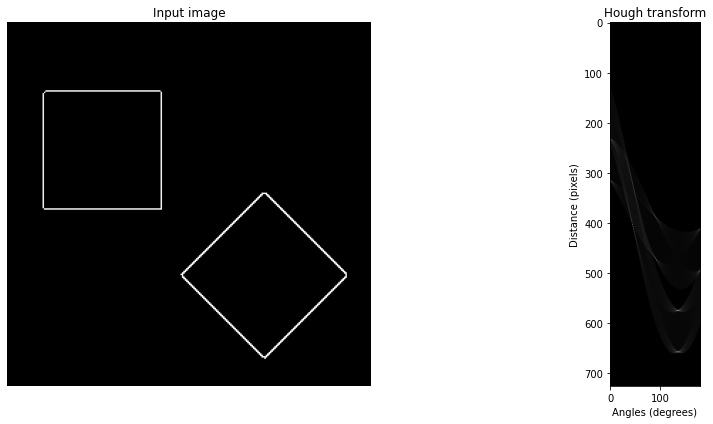

Liczba maksimow to: 8


In [3]:
kwadraty = cv2.imread("kwadraty.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(kwadraty, cmap="gray")
plt.axis("off")
plt.show()

edges = cv2.Canny(kwadraty, 0, 255)

plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

hough, theta, rho = hough_line(edges)

show_hough(hough, edges)

peaks = hough_line_peaks(hough, theta, rho)
print(f"Liczba maksimow to: {peaks[0].size}")

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

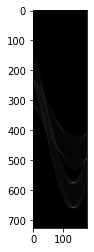

In [4]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(hough, 'gray') # gdzie H jest przestrzenią Hougha

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

<ipython-input-5-f6344f4aa8e3>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


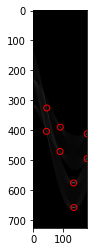

In [5]:
peaksImprowed = []
peaksImprowed.append(peaks[0])
peaksImprowed.append(np.rad2deg((peaks[1] + np.pi/2)))
peaksImprowed.append(peaks[2] + hough.shape[0]/2)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(hough, 'gray') 

for i in range(peaks[0].size):
    circle = plt.Circle((peaksImprowed[1][i], peaksImprowed[2][i]), 10, color='r', fill=False)
    ax.add_patch(circle)

fig.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

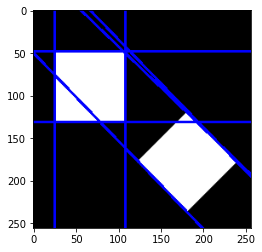

In [6]:
kwadraty2 = cv2.imread("kwadraty.png")
gray = cv2.cvtColor(kwadraty2,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 70)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(kwadraty2,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(kwadraty2)

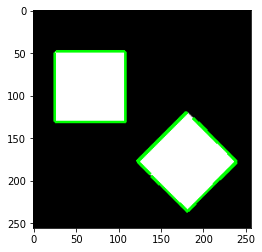

In [7]:
kwadraty2 = cv2.imread("kwadraty.png")
gray = cv2.cvtColor(kwadraty2,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

minLineLength = 10
maxLineGap = 10

lines = cv2.HoughLinesP(edges,1,np.pi/180,30,minLineLength,maxLineGap)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(kwadraty2,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(kwadraty2)

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

In [8]:
# Zrobione powyżej

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

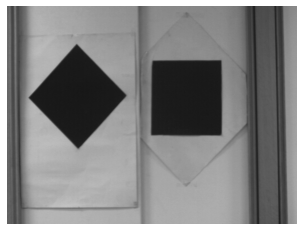

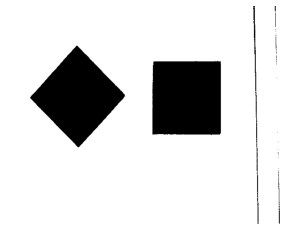

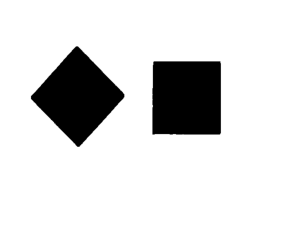

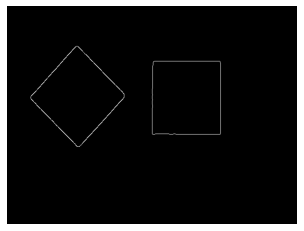

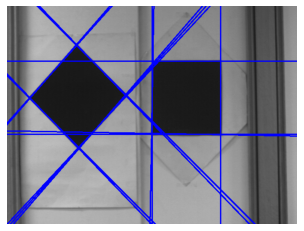

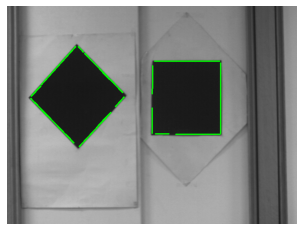

In [9]:
# Przygotowywanie do znalezienia lini

lab112 = cv2.imread("lab112.png")
gray = cv2.cvtColor(lab112,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

plt.imshow(lab112, cmap="gray")
plt.axis("off")
plt.show()

binarized = cv2.threshold(lab112, 35, 255, cv2.THRESH_BINARY)[1]

plt.imshow(binarized, cmap="gray")
plt.axis("off")
plt.show()

kernel = np.ones((5,5),np.uint8)
closed = cv2.morphologyEx(binarized, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed, cmap="gray")
plt.axis("off")
plt.show()

edges = cv2.Canny(closed, 0, 255)

plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

# Rysowanie znalezionych linii

canvas1 = cv2.imread("lab112.png")
lines = cv2.HoughLines(edges, 1, np.pi/180, 70)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(canvas1,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(canvas1)
plt.axis("off")
plt.show()


canvas2 = cv2.imread("lab112.png")
minLineLength = 10
maxLineGap = 10

lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength,maxLineGap)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(canvas2,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(canvas2)
plt.axis("off")
plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

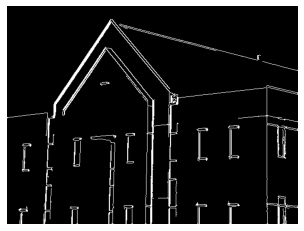

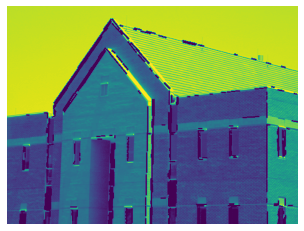

In [10]:
img = cv2.imread("dom.png", cv2.IMREAD_GRAYSCALE)

imgBlurred = cv2.GaussianBlur(img, (3, 3), 1.4)

# jakby nie dzialalo to tutaj zrobic sobela
#gx = np.gradient(imgBlurred, axis=0)
#gy = np.gradient(imgBlurred, axis=1)
gx = cv2.Sobel(np.float32(imgBlurred), cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(np.float32(imgBlurred), cv2.CV_64F, 0, 1, ksize=3)

M = np.sqrt(np.square(gx) + np.square(gy))
alphaRad = np.arctan2(gy, gx)

alpha = np.rad2deg(alphaRad)

d1 = np.logical_or(np.logical_and(alpha >= 67.5, alpha <= 112.5),
                   np.logical_and(alpha <= -67.5, alpha >= -112.5))
d2 = np.logical_or(np.logical_and(alpha >= -22.5, alpha <= 22.5),
                   np.logical_and(alpha <= -157.5, alpha >= 157.5))
d3 = np.logical_or(np.logical_and(alpha >= 67.5, alpha <= 112.5),
                   np.logical_and(alpha <= -67.5, alpha >= -112.5))
d4 = np.logical_or(np.logical_and(alpha >= 112.5, alpha <= 157.5),
                   np.logical_and(alpha <= -22.5, alpha >= -67.5))

nonMaximalSuppression = M.copy()
for rowIndex in range(1, M.shape[0]-1):
    for colIndex in range(1, M.shape[1]-1):
        enviroment = M[rowIndex-1:rowIndex+2, colIndex-1:colIndex+2]
        pixelValue = M[rowIndex, colIndex]
        if(d1[rowIndex, colIndex]):
            if(pixelValue < enviroment[0, 1] or pixelValue < enviroment[2, 1]):
                nonMaximalSuppression[rowIndex, colIndex] = 0
        elif(d2[rowIndex, colIndex]):
            if(pixelValue < enviroment[1, 0] or pixelValue < enviroment[1, 2]):
                nonMaximalSuppression[rowIndex, colIndex] = 0
        elif(d3[rowIndex, colIndex]):
            if(pixelValue < enviroment[0, 0] or pixelValue < enviroment[2, 2]):
                nonMaximalSuppression[rowIndex, colIndex] = 0
        elif(d4[rowIndex, colIndex]):  # Tu w zasadzie mógłby już być else
            if(pixelValue < enviroment[2, 0] or pixelValue < enviroment[0, 2]):
                nonMaximalSuppression[rowIndex, colIndex] = 0

th = 200
gnh = nonMaximalSuppression >= th
tl = 100
gnl = np.logical_and(th > nonMaximalSuppression, nonMaximalSuppression >= tl)

odwiedzonePiksele = np.zeros_like(nonMaximalSuppression).astype(np.bool)
resultEdges = np.zeros_like(nonMaximalSuppression)

pewnePiksele = []
for row in range(gnh.shape[0]):
    for col in range(gnh.shape[1]):
        if(gnh[row, col]):
            pewnePiksele.append((row, col))

while len(pewnePiksele) > 0:
    current = pewnePiksele.pop()
    if(not odwiedzonePiksele[current]):
        odwiedzonePiksele[current] = True
        resultEdges[current] = 255
        for rowEnv in range(current[0]-1, current[0]+2):
            for colEnv in range(current[1]-1, current[1]+2):
                if(rowEnv >= gnl.shape[0] or rowEnv < 0 or colEnv >= gnl.shape[1] or colEnv < 0):
                    continue
                if(gnl[rowEnv, colEnv]):
                    pewnePiksele.append((rowEnv, colEnv))

plt.imshow(resultEdges, cmap="gray")
plt.axis("off")
plt.show()

minLineLength = 20
maxLineGap = 5

lines = cv2.HoughLinesP(resultEdges.astype(np.uint8),1,np.pi/180,5,minLineLength,maxLineGap)
# dom = cv2.imread("dom.png")
img = cv2.imread("dom.png", cv2.IMREAD_GRAYSCALE)


for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img)
plt.axis("off")
plt.show()